## PISA Score와 GDP 상관 관계 구하기

PISA, GDP (2018년 기준) 데이터로 분석할 예정입니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 회귀,,
from sklearn import linear_model, datasets

# 내용 출력시 전체 보이도록
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
%matplotlib inline

### 1. 2018년 GDP 구하기  

In [2]:
data = pd.read_csv('gdp_per_capita.csv')
pisa_2018 = pd.read_csv('pisa_2018.csv')
gdp_data = data
gdp_2018_data = gdp_data.loc[:,['Country Name', 'Code', '2020']]
gdp_2018_data

,Country Name,Code,2020
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,1359.618224
2,Afghanistan,AFG,516.747871
3,Africa Western and Central,AFW,1710.073363
4,Angola,AGO,1776.166868
5,Albania,ALB,5246.292306
6,Andorra,AND,NaN
7,Arab World,ARB,5612.686570
8,United Arab Emirates,ARE,36284.555243
9,Argentina,ARG,8579.017773


### ✍ 데이터 전처리

In [3]:
# 불필요한 row 제거(값이 NaN인 경우)
gdp_2018_data = gdp_2018_data.dropna(axis=0)
gdp_2018_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 1 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  242 non-null    object 
 1   Code          242 non-null    object 
 2   2020          242 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.6+ KB


In [4]:
# 전처리 한 데이터에 컬럼을 붙여줍니다.

columns = ['나라', '나라코드', '1인당 GDP']
gdp_2018_data.columns = columns
gdp_2018_data.loc[31, '나라'] = 'Brunei'
gdp_2018_data.loc[96, '나라'] = 'Hong Kong'
gdp_2018_data.loc[146, '나라'] = 'Macau'
gdp_2018_data.loc[126, '나라'] = 'Republic of Korea'
gdp_2018_data.loc[221, '나라'] = 'Slovakia'
gdp_2018_data

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,나라,나라코드,1인당 GDP
1,Africa Eastern and Southern,AFE,1359.618224
2,Afghanistan,AFG,516.747871
3,Africa Western and Central,AFW,1710.073363
4,Angola,AGO,1776.166868
5,Albania,ALB,5246.292306
7,Arab World,ARB,5612.686570
8,United Arab Emirates,ARE,36284.555243
9,Argentina,ARG,8579.017773
10,Armenia,ARM,4266.018074
11,American Samoa,ASM,12844.900991


In [5]:
gdp_country_set = set(gdp_2018_data['나라'].unique())
gdp_country_set

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East A

###  2. PISA 2018 데이터와 비교

- PISA의 전처리는 다른 파일에서 작성했고 해당 결과를 `pisa_2018.csv` 파일로 가져와서 사용합니다.

In [6]:
# PISA 2018 데이터에 있는 국가 리스트를 추출해 GDP 값이 존재하는 국가들과 비교합니다.
pisa_2018_data = pisa_2018
pisa_2018_data = pisa_2018_data.set_index('Unnamed: 0').reset_index(drop=True)
pisa_country_set = set(pisa_2018_data['Country'].unique())

In [7]:
common_country = pisa_country_set & gdp_country_set
common_country

{'Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kosovo',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United 

In [8]:
# 공통 국가를 기준으로 gdp, pisa 데이터에서 추출

gdp_2018_data = gdp_2018_data[gdp_2018_data['나라'].isin(common_country)].sort_values(by='나라').reset_index(drop=True)
pisa_2018_data = pisa_2018_data[pisa_2018_data['Country'].isin(common_country)].sort_values(by='Country').reset_index(drop=True)

In [9]:
# 두 데이터를 나라 순으로 정렬하여 합칩니다. 
pisa_gdp_2018 = pd.concat([gdp_2018_data, pisa_2018_data.loc[:, ['Score', 'Rank']]],  axis=1)
pisa_gdp_2018 = pisa_gdp_2018.rename(columns={'Score': 'PISA 점수', 'Rank': 'PISA 순위'})
pisa_gdp_2018

,나라,나라코드,1인당 GDP,PISA 점수,PISA 순위
0,Albania,ALB,5246.292306,405.0,62.0
1,Argentina,ARG,8579.017773,402.0,64.0
2,Australia,AUS,51692.842748,503.0,17.0
3,Austria,AUT,48586.801321,484.0,28.0
4,Azerbaijan,AZE,4221.407478,389.0,69.0
5,Belarus,BLR,6424.152176,474.0,36.0
6,Belgium,BEL,45159.348223,493.0,23.0
7,Bosnia and Herzegovina,BIH,6079.738285,403.0,63.0
8,Brazil,BRA,6796.844542,413.0,58.0
9,Brunei,BRN,27442.953828,408.0,60.0


### 4. GDP와 PISA Reading Score의 관계 시각화

- Reading score가 높을수록 gdp에 어떤 영향을 주는지 보기 위해 `seaborn`의 `regplot`을 사용합니다.
- 만약 그래프가 우상향 한다면 양의 상관관계를 가진다고 할 수 있습니다. 
- `scikit-learn`의 `LinearRegression` 을 한번 사용해 보겠습니다.

<AxesSubplot:xlabel='PISA 점수', ylabel='1인당 GDP'>

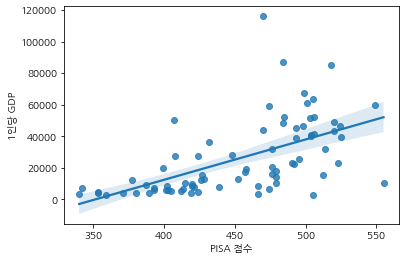

In [10]:
# 1인당 gdp와 reading Score의 관계를 확인하기 위해 Seaborn의 regplot을 그려봅니다.
# 변화를 좀더 명확하게 보기 위해 x축과 y축에 limit을 걸어줍니다.

# plt.ylim(10000, 120000)
# plt.xlim(450, 530)
sns.regplot(x = 'PISA 점수', y = '1인당 GDP', data = pisa_gdp_2018)

기울기: [255.54298584]


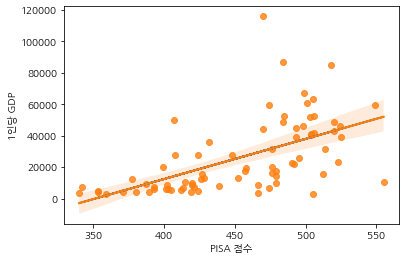

In [11]:
# sklearn 사용
# 선형 회귀 모델을 적용하기 위해 sklearn의 lineRegression을 사용해 보았습니다.
# 이 부분은 관련 지식 없이 간단하게 적용해본 test라고 보시면 됩니다.

line_fitter = linear_model.LinearRegression()
x = pisa_gdp_2018['PISA 점수']
y = pisa_gdp_2018['1인당 GDP']
line_fitter.fit(x.values.reshape(-1, 1), y)

print("기울기:", line_fitter.coef_)
plt.plot(x, line_fitter.predict(x.values.reshape(-1,1)))
# plt.ylim(10000, 120000)
# plt.xlim(450, 530)
sns.regplot(x = 'PISA 점수', y = '1인당 GDP', data = pisa_gdp_2018)
plt.show()

In [12]:
pisa_gdp_2018.corr()

,1인당 GDP,PISA 점수,PISA 순위
1인당 GDP,1.000000,0.578925,-0.579101
PISA 점수,0.578925,1.000000,-0.986068
PISA 순위,-0.579101,-0.986068,1.000000


Ransac_coef: [123.13046092]


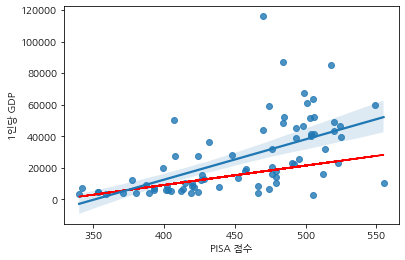

In [13]:
# sklearn 사용
# RANSAC 모델을 사용해보았습니다.

X = pisa_gdp_2018['PISA 점수']
y = pisa_gdp_2018['1인당 GDP']

ransac = linear_model.RANSACRegressor()
ransac.fit(X.values.reshape(-1, 1), y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = X.values.reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

print("Ransac_coef:", ransac.estimator_.coef_)
plt.plot(
    line_X,
    line_y_ransac,
    color="red",
    label="RANSAC regressor",
)
# plt.ylim(10000, 120000)
# plt.xlim(450, 530)
sns.regplot(x = 'PISA 점수', y = '1인당 GDP', data = pisa_gdp_2018)
plt.show()

## outlier 제거 후 다시 그려보기
- 기준: 
    - 1. IQR : 4분위수에서 (Q3 - Q1) 값, 이상치 범위는 (X < Q1 - 1.5 * IQR  || X > Q3 + 1.5 * IQR) 
    - 2. 3시그마 : 시그마는 표준편차이며 이상치 범위는 (X < 평균 - 3시그마 || X > 평균 + 3시그마)

In [14]:
pisa_gdp_2018[['1인당 GDP', 'PISA 점수']].describe()

,1인당 GDP,PISA 점수
count,77.000000,77.000000
mean,26014.765578,453.103896
std,23456.162319,53.139237
min,2785.724161,340.000000
25%,7268.196910,412.000000
50%,17622.541003,466.000000
75%,41441.466667,498.000000
max,116014.602497,555.000000


### Outlier 제거 - IQR 이용

<AxesSubplot:ylabel='PISA 점수'>

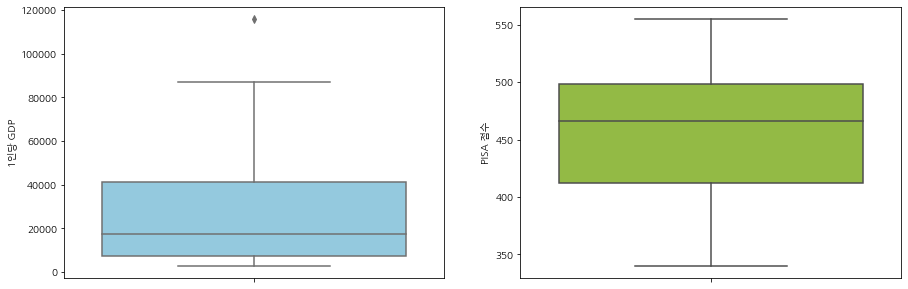

In [15]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
sns.boxplot(y='1인당 GDP', data=pisa_gdp_2018, ax=ax[0], color='skyblue')
sns.boxplot(y='PISA 점수', data=pisa_gdp_2018, ax=ax[1], color='yellowgreen')

In [16]:
def remove_outlier_by_IQR(df, col=[]):
    data = df
    for col_name in col:
        s = data[col_name]
        IQR = s.quantile(0.75) - s.quantile(0.25)
        data = data[s.between(s.quantile(0.25) - (1.5 * IQR), s.quantile(0.75) + (1.5 * IQR))]
    return data

data_IQR = remove_outlier_by_IQR(pisa_gdp_2018, ['1인당 GDP', 'PISA 점수'])[['나라', '1인당 GDP', 'PISA 점수']]
data_IQR.describe()

,1인당 GDP,PISA 점수
count,76.000000,76.000000
mean,24830.557197,452.881579
std,21168.532825,53.456267
min,2785.724161,340.000000
25%,7247.866205,411.000000
50%,16801.640946,466.000000
75%,41154.743273,498.250000
max,87097.036450,555.000000


Ransac_coef: [224.09224678]


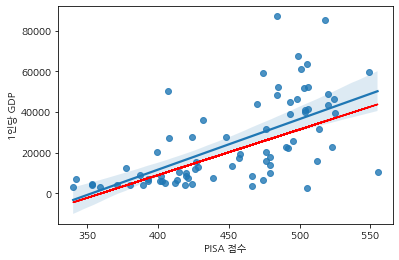

In [17]:
# sklearn 사용
# RANSAC 모델을 사용해보았습니다.

X = data_IQR['PISA 점수']
y = data_IQR['1인당 GDP']

ransac = linear_model.RANSACRegressor(min_samples=30)
ransac.fit(X.values.reshape(-1, 1), y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = X.values.reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

print("Ransac_coef:", ransac.estimator_.coef_)
plt.plot(
    line_X,
    line_y_ransac,
    color="red",
    label="RANSAC regressor",
)
# plt.ylim(10000, 120000)
# plt.xlim(450, 530)
sns.regplot(x = 'PISA 점수', y = '1인당 GDP', data = data_IQR)
plt.show()

### Outlier 제거 - 시그마 이용
- 평균적으로 2시그마는 95%, 3시그마는 99.7% 의 데이터를 커버한다고 보면 된다.

In [18]:
gdp_std = pisa_gdp_2018['1인당 GDP'].std()
score_std = pisa_gdp_2018['PISA 점수'].std()

In [19]:
def remove_outlier_by_sigma(df, col=[], n=3):
    data = df
    for col_name in col:
        s = data[col_name]
        sigma = s.std()
        avg = s.mean()
        data = data[s.between(avg - (n * sigma), avg + (n * sigma))]
    return data

data_3sigma = remove_outlier_by_sigma(pisa_gdp_2018, ['1인당 GDP', 'PISA 점수'], 3)[['나라', '1인당 GDP', 'PISA 점수']]
data_3sigma.describe()

,1인당 GDP,PISA 점수
count,76.000000,76.000000
mean,24830.557197,452.881579
std,21168.532825,53.456267
min,2785.724161,340.000000
25%,7247.866205,411.000000
50%,16801.640946,466.000000
75%,41154.743273,498.250000
max,87097.036450,555.000000


In [20]:
data_2sigma = remove_outlier_by_sigma(pisa_gdp_2018, ['1인당 GDP', 'PISA 점수'], 2)[['나라', '1인당 GDP', 'PISA 점수']]
data_2sigma.describe()

,1인당 GDP,PISA 점수
count,72.000000,72.000000
mean,23669.312768,454.652778
std,18842.974250,50.885998
min,2785.724161,353.000000
25%,7554.582692,412.750000
50%,16801.640946,466.000000
75%,40409.731536,498.250000
max,67329.677791,555.000000


Ransac_coef: [261.74109597]


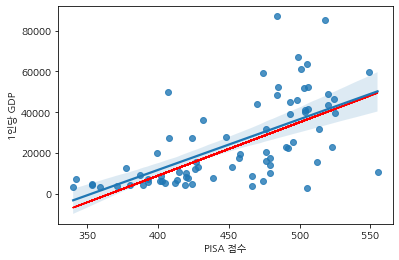

In [21]:
# sklearn 사용
# RANSAC 모델을 사용해보았습니다.

X = data_3sigma['PISA 점수']
y = data_3sigma['1인당 GDP']

ransac = linear_model.RANSACRegressor(min_samples=30)
ransac.fit(X.values.reshape(-1, 1), y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = X.values.reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

print("Ransac_coef:", ransac.estimator_.coef_)
plt.plot(
    line_X,
    line_y_ransac,
    color="red",
    label="RANSAC regressor",
)
# plt.ylim(10000, 120000)
# plt.xlim(450, 530)
sns.regplot(x = 'PISA 점수', y = '1인당 GDP', data = data_3sigma)
plt.show()

In [22]:
pisa_gdp_2018.corr()

,1인당 GDP,PISA 점수,PISA 순위
1인당 GDP,1.000000,0.578925,-0.579101
PISA 점수,0.578925,1.000000,-0.986068
PISA 순위,-0.579101,-0.986068,1.000000


In [23]:
line_X = np.squeeze(line_X)
line_X = line_X.astype('float64')
len(line_X)

76

In [24]:
len(line_y_ransac)

76

In [25]:
ransac_df = pd.concat([pd.Series(line_X), pd.Series(line_y_ransac)], axis=1)
ransac_df.columns = ['x', 'y']
ransac_df

,x,y
0,405.0,10179.550792
1,402.0,9394.327505
2,503.0,35830.178197
3,484.0,30857.097374
4,389.0,5991.693257
5,474.0,28239.686414
6,493.0,33212.767238
7,403.0,9656.068601
8,413.0,12273.479560
9,408.0,10964.774080


In [26]:
data_3sigma.columns = ['Country', 'GDP per Capita', 'PISA Score']
data_3sigma.to_json('pisa_gdp.json', orient = 'records')


In [27]:
ransac_df.to_json('ransac.json', orient = 'records')